In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

In [2]:
marketing_data= pd.read_csv("marketing_data_clean.csv").drop("Unnamed: 0", axis=1)

In [3]:
marketing_data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691,0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564,0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931,0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [4]:
marketing_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

# Data Wrangling 

### Created column that is sum of amount spent on all products

In [5]:
marketing_data['TotalSpent'] = marketing_data['MntWines'] + marketing_data['MntSweetProducts'] + marketing_data['MntMeatProducts'] + marketing_data['MntGoldProds'] +marketing_data['MntFruits'] + marketing_data['MntFishProducts'] 



### Created column that is sum of all purchase types (Web, Catalog, Store, etc.)

In [6]:
marketing_data["TotalPurchases"]= marketing_data['NumCatalogPurchases'] + marketing_data['NumStorePurchases'] +  marketing_data['NumWebPurchases']


### Created column that calculates avereage amount spent per purchase

In [7]:
marketing_data["AverageSpentPerPurchase"] = marketing_data['TotalSpent'] / marketing_data['TotalPurchases']

In [8]:
marketing_data.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [9]:
marketing_data.describe(include = ["O"])

,Education,Marital_Status,Dt_Customer,Country
count,2216,2216,2216,2216
unique,5,8,662,8
top,Graduation,Married,8/31/12,SP
freq,1116,857,12,1093


### Bachelors had highest count w/ 1116 customers

In [10]:
marketing_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'TotalSpent',
       'TotalPurchases', 'AverageSpentPerPurchase'],
      dtype='object')

<AxesSubplot:>

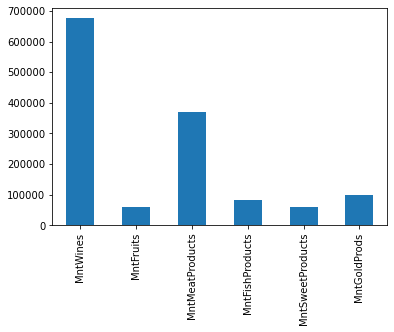

In [11]:
marketing_data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().plot(kind="bar")

# Wine was highest seller followed by meats

<AxesSubplot:>

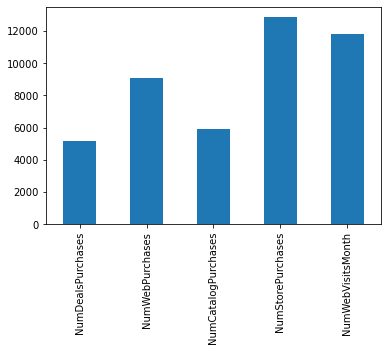

In [12]:
marketing_data[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum().plot(kind="bar")

# Most purchases were in stores followed by web purchases

In [13]:
total_purchases = sum(marketing_data[['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum().values)
total_purchases 

39614

# There was a total of 39,614 purchases from all customers

In [14]:
marketing_data["NumDealsPurchases"].sum() / total_purchases 

0.1299793002473873

# 13% of purchases had a deal 

In [15]:
marketing_data.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

# 481 customers has PhD's and 365 had Masters

In [16]:
marketing_data.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

# Married status had top rank with 857 customers.

In [17]:
marketing_data.Country.value_counts()

SP     1093
SA      337
CA      266
IND     147
AUS     147
GER     116
US      107
ME        3
Name: Country, dtype: int64

# Majority of customers were in Spain

/Users/leticiaguido/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

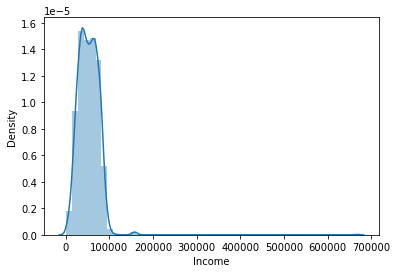

In [18]:

sns.distplot(marketing_data.Income)

/Users/leticiaguido/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

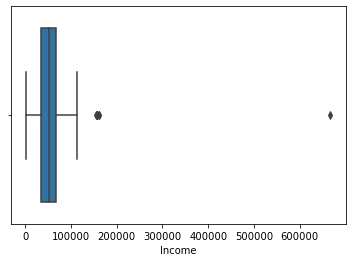

In [19]:
sns.boxplot(marketing_data.Income)

# Income outliers making 150,000 and one customer making > 600,000k

# Removing Outliers

/Users/leticiaguido/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

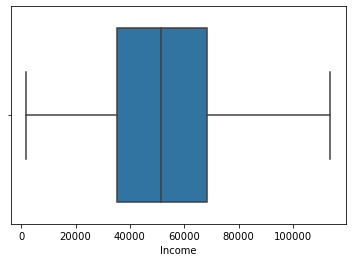

In [20]:
sns.boxplot(marketing_data[marketing_data["Income"] < 150000]["Income"])

# Median Income is around 50,000k

/Users/leticiaguido/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

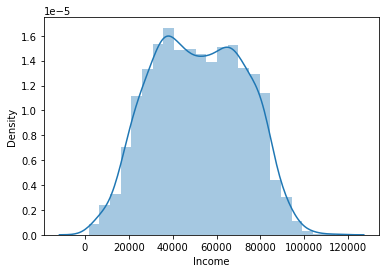

In [21]:
sns.distplot(marketing_data[marketing_data["Income"] < 150000]["Income"])

# Income is normally distributed

In [22]:
marketing_data[marketing_data["Income"] > 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalSpent,TotalPurchases,AverageSpentPerPurchase
323,4931,1977,Graduation,Together,157146,0,0,4/29/13,13,1,...,0,0,0,0,0,0,SA,1730,28,61.785714
493,1501,1982,PhD,Married,160803,0,0,8/4/12,21,55,...,0,0,0,0,0,0,US,1717,29,59.206897
522,9432,1977,Graduation,Together,666666,1,0,6/2/13,23,9,...,0,0,0,0,0,0,SA,62,7,8.857143
725,1503,1976,PhD,Together,162397,1,1,6/3/13,31,85,...,0,0,0,0,0,0,SP,107,1,107.000000
847,5336,1971,Master,Together,157733,1,0,6/4/13,37,39,...,0,0,0,0,0,0,SP,59,2,29.500000
1810,5555,1975,Graduation,Divorced,153924,0,0,2/7/14,81,1,...,0,0,0,0,0,0,SP,6,0,inf
1906,11181,1949,PhD,Married,156924,0,0,8/29/13,85,2,...,0,0,0,0,0,0,CA,8,0,inf
2180,8475,1973,PhD,Married,157243,0,1,3/1/14,98,20,...,0,0,0,0,0,0,IND,1608,22,73.090909


# %57 percent of customers who made >150,000 had PHDS

In [23]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [24]:
marketing_data[marketing_data["Income"] > 100000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalSpent,TotalPurchases,AverageSpentPerPurchase
141,10089,1974,Graduation,Divorced,102692,0,0,4/5/13,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,1,0,SA,1112,28,39.714286
209,4619,1945,PhD,Single,113734,0,0,5/28/14,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,SP,277,27,10.259259
323,4931,1977,Graduation,Together,157146,0,0,4/29/13,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,1730,28,61.785714
493,1501,1982,PhD,Married,160803,0,0,8/4/12,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,1717,29,59.206897
522,9432,1977,Graduation,Together,666666,1,0,6/2/13,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA,62,7,8.857143
725,1503,1976,PhD,Together,162397,1,1,6/3/13,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP,107,1,107.000000
826,4611,1970,Graduation,Together,105471,0,0,1/21/13,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,1,0,SP,1724,30,57.466667
847,5336,1971,Master,Together,157733,1,0,6/4/13,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP,59,2,29.500000
1233,2798,1977,PhD,Together,102160,0,0,11/2/12,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,1,0,SA,1240,26,47.692308
1550,7215,1983,Graduation,Single,101970,0,0,3/12/13,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,1,0,CA,1135,27,42.037037


In [25]:
marketing_data[marketing_data["TotalPurchases"] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalSpent,TotalPurchases,AverageSpentPerPurchase
452,3955,1965,Graduation,Divorced,4861,0,0,6/22/14,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,0,SA,6,0,inf
657,9931,1963,PhD,Married,4023,1,1,6/23/14,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,SP,9,0,inf
1280,11110,1973,Graduation,Single,3502,1,0,4/13/13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,IND,5,0,inf
1454,6862,1971,Graduation,Divorced,1730,0,0,5/18/14,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,0,SP,8,0,inf
1810,5555,1975,Graduation,Divorced,153924,0,0,2/7/14,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,SP,6,0,inf
1906,11181,1949,PhD,Married,156924,0,0,8/29/13,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,CA,8,0,inf


In [26]:
# get rid of these

# %50 percent of customers who made >100,000 had PHDS

# Removing income outlier because it looks suspect (666666 annually). Human entry Error?

In [27]:
marketing_data = marketing_data.drop(522, axis=0)

# Begin Analysis

<AxesSubplot:>

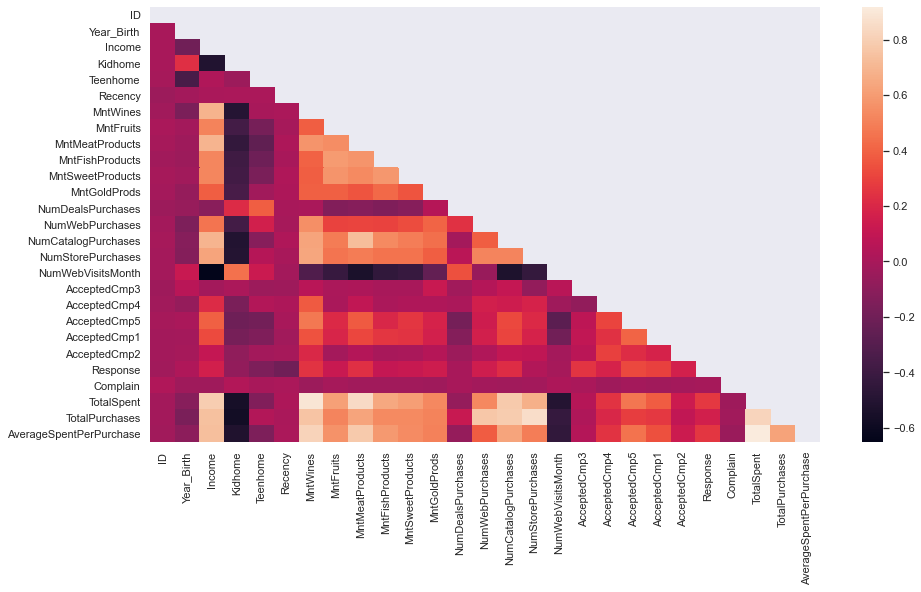

In [28]:
sns.set(rc = {'figure.figsize':(15,8)})
corr = marketing_data.corr()
sns.heatmap(corr, mask = np.triu(corr))

# Negative correlation between kids at home and wine spent. ****Look through and find light and dark squares and take note of relationships that may be interesting***** i.e. meats were bought from catalogs

# Data Prep continued
## Create Age column

In [29]:
marketing_data2 = marketing_data.copy()
marketing_data2["Age"] = 2021 - marketing_data["Year_Birth"] 

In [30]:
marketing_data2.Age.describe()

count    2215.000000
mean       52.183296
std        11.987000
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

In [31]:
marketing_data2[marketing_data2["Age"] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalSpent,TotalPurchases,AverageSpentPerPurchase,Age
509,11004,1893,2n Cycle,Single,60182,0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,22,3,7.333333,128
821,1150,1899,PhD,Together,83532,0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,1853,14,132.357143,122
2209,7829,1900,2n Cycle,Divorced,36640,1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,65,5,13.000000,121


# Get rid of outliers. Customers that are 120+ years old?

In [32]:
marketing_data2 = marketing_data2[marketing_data2["Age"] < 100]

# Create age group column

In [33]:
def age_recode(series):
    if series < 30:
        return("20's")
    if series < 40:
        return("30's")
    if series < 50:
        return("40's")
    if series < 60:
        return("50's")
    if series < 70:
        return("60's")
    if series < 80:
        return("70's")
    if series < 90:
        return("80's")
    if series < 100:
        return("90's")
    
marketing_data2["Age_Group"]  = marketing_data2["Age"].apply(age_recode)

In [34]:
marketing_data2["Age_Group"] 

0       50's
1       60's
2       60's
3       50's
4       30's
5       60's
6       60's
7       50's
8       60's
9       60's
10      70's
11      40's
12      60's
13      40's
14      50's
15      40's
16      40's
17      60's
18      60's
19      60's
20      60's
21      50's
22      40's
23      40's
24      50's
25      50's
26      60's
27      60's
28      60's
29      40's
30      50's
31      30's
32      40's
33      40's
34      30's
35      30's
36      30's
37      60's
38      60's
39      50's
40      40's
41      60's
42      30's
43      30's
44      50's
45      60's
46      40's
47      50's
48      50's
49      60's
50      30's
51      60's
52      40's
53      60's
54      40's
55      60's
56      40's
57      40's
58      50's
59      50's
60      30's
61      60's
62      50's
63      40's
64      40's
65      30's
66      60's
67      60's
68      40's
69      40's
70      40's
71      50's
72      40's
73      50's
74      50's
75      50's
76      50's

In [35]:
complain_age_crosstab = pd.crosstab(marketing_data2.Complain, marketing_data2.Age_Group)

In [36]:
complain_age_crosstab

Age_Group,20's,30's,40's,50's,60's,70's,80's
Complain,,,,,,,
0,27,311,642,578,460,172,2
1,1,3,6,1,6,3,0


# Majority were in 40s, 50s, 60s

# Analysis continued

# Basic ANOVA

In [37]:

stats.chi2_contingency(complain_age_crosstab)

(7.757876696166789,
 0.25638398688664676,
 6,
 array([[2.77468354e+01, 3.11160940e+02, 6.42141049e+02, 5.73764919e+02,
         4.61786618e+02, 1.73417722e+02, 1.98191682e+00],
        [2.53164557e-01, 2.83905967e+00, 5.85895118e+00, 5.23508137e+00,
         4.21338156e+00, 1.58227848e+00, 1.80831826e-02]]))

# There may a relationship between age group and complaints but not enough to pass chi-square test. p = 0.17

In [38]:
marketing_data2["Dt_Customer"] = pd.to_datetime(marketing_data2["Dt_Customer"])

In [39]:
marketing_data2['DOW_Enroll'] = marketing_data2["Dt_Customer"].dt.dayofweek

In [40]:
marketing_data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'TotalSpent',
       'TotalPurchases', 'AverageSpentPerPurchase', 'Age', 'Age_Group',
       'DOW_Enroll'],
      dtype='object')

In [41]:
cmp1_age_crosstab = pd.crosstab(marketing_data2.Age_Group, marketing_data2.AcceptedCmp1)
cmp2_age_crosstab = pd.crosstab(marketing_data2.Age_Group, marketing_data2.AcceptedCmp2)
cmp3_age_crosstab = pd.crosstab(marketing_data2.Age_Group, marketing_data2.AcceptedCmp3)
cmp4_age_crosstab = pd.crosstab(marketing_data2.Age_Group, marketing_data2.AcceptedCmp4)
cmp5_age_crosstab = pd.crosstab(marketing_data2.Age_Group, marketing_data2.AcceptedCmp5)

In [42]:
stats.chi2_contingency(cmp1_age_crosstab)

(13.919765703557838,
 0.030545380147450535,
 6,
 array([[2.62025316e+01, 1.79746835e+00],
        [2.93842676e+02, 2.01573237e+01],
        [6.06401447e+02, 4.15985533e+01],
        [5.41830922e+02, 3.71690778e+01],
        [4.36084991e+02, 2.99150090e+01],
        [1.63765823e+02, 1.12341772e+01],
        [1.87160940e+00, 1.28390597e-01]]))

In [43]:
stats.chi2_contingency(cmp2_age_crosstab)

(8.815025256857925,
 0.1842512777379885,
 6,
 array([[2.76202532e+01, 3.79746835e-01],
        [3.09741410e+02, 4.25858951e+00],
        [6.39211573e+02, 8.78842676e+00],
        [5.71147378e+02, 7.85262206e+00],
        [4.59679928e+02, 6.32007233e+00],
        [1.72626582e+02, 2.37341772e+00],
        [1.97287523e+00, 2.71247740e-02]]))

In [44]:
stats.chi2_contingency(cmp3_age_crosstab)

(10.523532171776854,
 0.10426655338605771,
 6,
 array([[2.59367089e+01, 2.06329114e+00],
        [2.90861664e+02, 2.31383363e+01],
        [6.00249548e+02, 4.77504521e+01],
        [5.36334087e+02, 4.26659132e+01],
        [4.31660940e+02, 3.43390597e+01],
        [1.62104430e+02, 1.28955696e+01],
        [1.85262206e+00, 1.47377939e-01]]))

In [45]:
stats.chi2_contingency(cmp4_age_crosstab)

(13.107886147603342,
 0.041354340824703455,
 6,
 array([[2.59240506e+01, 2.07594937e+00],
        [2.90719711e+02, 2.32802893e+01],
        [5.99956600e+02, 4.80433996e+01],
        [5.36072333e+02, 4.29276673e+01],
        [4.31450271e+02, 3.45497288e+01],
        [1.62025316e+02, 1.29746835e+01],
        [1.85171790e+00, 1.48282098e-01]]))

In [46]:
stats.chi2_contingency(cmp5_age_crosstab)

(26.94273390923277,
 0.00014842861707354898,
 6,
 array([[2.59620253e+01, 2.03797468e+00],
        [2.91145570e+02, 2.28544304e+01],
        [6.00835443e+02, 4.71645570e+01],
        [5.36857595e+02, 4.21424051e+01],
        [4.32082278e+02, 3.39177215e+01],
        [1.62262658e+02, 1.27373418e+01],
        [1.85443038e+00, 1.45569620e-01]]))

# BASIC ANOVAs - Comparing age groups and campaign participation, there is a statisitical certainity of a relationship between age groups and which campaigns they participated in

In [47]:
cmp1_age_crosstab

AcceptedCmp1,0,1
Age_Group,,
20's,24,4
30's,289,25
40's,613,35
50's,553,26
60's,432,34
70's,157,18
80's,2,0


In [48]:
camp1 = cmp1_age_crosstab.reset_index()[1].values
camp2 = cmp2_age_crosstab.reset_index()[1].values
camp3 = cmp3_age_crosstab.reset_index()[1].values
camp4 = cmp4_age_crosstab.reset_index()[1].values
camp5 = cmp5_age_crosstab.reset_index()[1].values

camp_age_array = np.array([camp1, camp2, camp3, camp4, camp5])
camp_age_array
camp_age_df = pd.DataFrame(data=camp_age_array, columns = list(cmp1_age_crosstab.index), 
                           index = ["camp1", "camp2", "camp3", "camp4", "camp5"])
camp_age_df = camp_age_df.transpose()
camp_age_df["max"] = camp_age_df.max(axis=1)
camp_age_df["max%"] = (camp_age_df.max(axis=1) / camp_age_df.sum(axis=1))*100

In [49]:
camp_age_df

,camp1,camp2,camp3,camp4,camp5,max,max%
20's,4,1,4,1,4,4,22.222222
30's,25,4,32,18,39,39,24.840764
40's,35,5,54,34,37,54,24.657534
50's,26,9,37,47,31,47,23.857868
60's,34,11,25,46,32,46,23.711340
70's,18,0,11,18,17,18,21.951220
80's,0,0,0,0,1,1,50.000000


<AxesSubplot:>

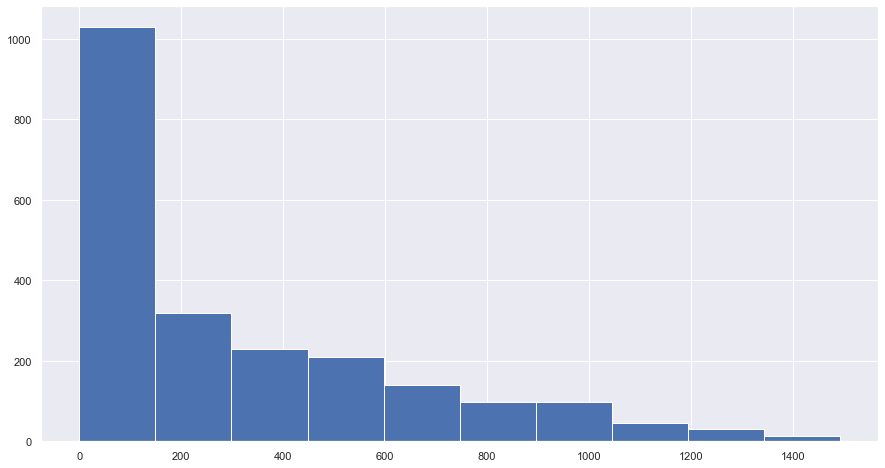

In [50]:
marketing_data2['MntWines'].hist()

In [51]:
marketing_data2.Marital_Status.value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [52]:
marital_statuses = marketing_data2.Marital_Status.unique()
marital_statuses

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [53]:
stats.fligner(marketing_data2.MntWines, marketing_data2.Marital_Status.replace(marital_statuses, np.arange(len(marital_statuses))))

FlignerResult(statistic=2748.1164514727484, pvalue=0.0)

In [54]:
divorced_wine = marketing_data2[marketing_data2["Marital_Status"] == 'Divorced']["MntWines"]
single_wine = marketing_data2[(marketing_data2["Marital_Status"] == 'Single') | (marketing_data2["Marital_Status"] == 'Alone')]["MntWines"]
married_wine = marketing_data2[marketing_data2["Marital_Status"] == 'Married']["MntWines"]
together_wine = marketing_data2[marketing_data2["Marital_Status"] == 'Together']["MntWines"]
widow_wine = marketing_data2[marketing_data2["Marital_Status"] == 'Widow']["MntWines"]

marital_array = [divorced_wine, single_wine, married_wine, together_wine, widow_wine]

stats.f_oneway(*marital_array)

F_onewayResult(statistic=1.1291343590012426, pvalue=0.3408952548349607)

# No relationship between marital status and amount of money spent on wine

In [265]:
marketing_data2.Education.value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [55]:
education_level = marketing_data2.Education.unique()
education_level

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [56]:
stats.fligner(marketing_data2.MntWines, marketing_data2.Education.replace(education_level, np.arange(len(education_level))))


FlignerResult(statistic=2734.9150271881613, pvalue=0.0)

In [57]:
grad_wine = marketing_data2[marketing_data2["Education"] == 'Graduation']["MntWines"]
phd_wine = marketing_data2[marketing_data2["Education"] == 'PhD']["MntWines"]
second_wine = marketing_data2[marketing_data2["Education"] == '2n Cycle']["MntWines"]
master_wine = marketing_data2[marketing_data2["Education"] == 'Master']["MntWines"]
basic_wine = marketing_data2[marketing_data2["Education"] == 'Basic']["MntWines"]

education_array = [grad_wine, phd_wine, second_wine, master_wine, basic_wine]

stats.f_oneway(*education_array)

F_onewayResult(statistic=28.89812306723, pvalue=1.9152040356669162e-23)

# Relationship between education level and amount spent on wine

In [58]:
marketing_data2.groupby("Education")["MntWines"].mean()

Education
2n Cycle      202.757576
Basic           7.240741
Graduation    285.293274
Master        332.980822
PhD           406.497917
Name: MntWines, dtype: float64

# Post hocs Education

In [269]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [270]:
education_level, np.arange(len(education_level))

(array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object),
 array([0, 1, 2, 3, 4]))

In [271]:
postHocEd = MultiComparison(marketing_data2["MntWines"], marketing_data2.Education.replace(education_level, np.arange(len(education_level))))
postHocResultsEd = postHocEd.tukeyhsd()
print(postHocResultsEd)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1  121.2046  0.001   72.1543  170.2549   True
     0      2  -82.5357 0.0102 -151.8275  -13.2439   True
     0      3   47.6875 0.1151   -6.4959   101.871  False
     0      4 -278.0525  0.001 -403.2491  -152.856   True
     1      2 -203.7403  0.001 -279.6297  -127.851   True
     1      3  -73.5171 0.0115 -135.9165  -11.1176   True
     1      4 -399.2572  0.001 -528.2224  -270.292   True
     2      3  130.2232  0.001   50.9193  209.5272   True
     2      4 -195.5168 0.0011 -333.4568  -57.5768   True
     3      4 -325.7401  0.001 -456.7436 -194.7365   True
---------------------------------------------------------


In [272]:
marketing_data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'TotalSpent',
       'TotalPurchases', 'AverageSpentPerPurchase', 'Age', 'Age_Group',
       'DOW_Enroll'],
      dtype='object')

In [273]:
# education in groups bar graphs/plots ...if you have two continuous variables scatter plot, git hub so i can share with dr lumian, 


In [274]:
marketing_data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'TotalSpent',
       'TotalPurchases', 'AverageSpentPerPurchase', 'Age', 'Age_Group',
       'DOW_Enroll'],
      dtype='object')

# Create a dataframe with aggreate data for each campaign

In [275]:
campaign_df = pd.DataFrame(data=np.transpose([list(marketing_data2.groupby("AcceptedCmp1").sum().iloc[1,:].values), 
                                 list(marketing_data2.groupby("AcceptedCmp2").sum().iloc[1,:].values),
                                 list(marketing_data2.groupby("AcceptedCmp3").sum().iloc[1,:].values),
                                 list(marketing_data2.groupby("AcceptedCmp4").sum().iloc[1,:].values),
                                 list(marketing_data2.groupby("AcceptedCmp5").sum().iloc[1,:].values)]), 
                           columns=["campaign1","campaign2","campaign3","campaign4","campaign5"])

In [276]:
campaign_df

,campaign1,campaign2,campaign3,campaign4,campaign5
0,7.614270e+05,1.551770e+05,8.434550e+05,8.713860e+05,8.909250e+05
1,2.795100e+05,5.904400e+04,3.213460e+05,3.224270e+05,3.171230e+05
2,1.119991e+07,2.131645e+06,8.280821e+06,1.126077e+07,1.325763e+07
3,1.200000e+01,2.000000e+00,7.700000e+01,2.200000e+01,8.000000e+00
4,2.900000e+01,1.300000e+01,6.900000e+01,9.500000e+01,2.200000e+01
5,6.629000e+03,1.460000e+03,7.449000e+03,8.333000e+03,7.896000e+03
6,1.076400e+05,2.696000e+04,6.172100e+04,1.230380e+05,1.407950e+05
7,7.884000e+03,6.890000e+02,4.628000e+03,4.470000e+03,9.011000e+03
8,6.181100e+04,7.509000e+03,2.961200e+04,3.930500e+04,7.523800e+04
9,1.311600e+04,1.162000e+03,6.128000e+03,6.684000e+03,1.219100e+04


# Transpose data to correct format

In [277]:
campaign_df = np.transpose(campaign_df)

In [278]:
columns = marketing_data2.groupby("AcceptedCmp1").sum().columns

# Assign column names and drop variables that serve no purpose as aggregates

In [279]:
campaign_df.columns = columns
campaign_df = campaign_df.drop(["ID", "Year_Birth", "Age", "Response", "AverageSpentPerPurchase"], axis=1)


In [280]:
campaign_df['AverageSpentPerPurchase'] = campaign_df['TotalSpent'] / campaign_df['TotalPurchases']

In [281]:
campaign_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2',
       'Complain', 'TotalSpent', 'TotalPurchases', 'DOW_Enroll',
       'AverageSpentPerPurchase'],
      dtype='object')

Text(0.5, 1.0, 'Total Spent')

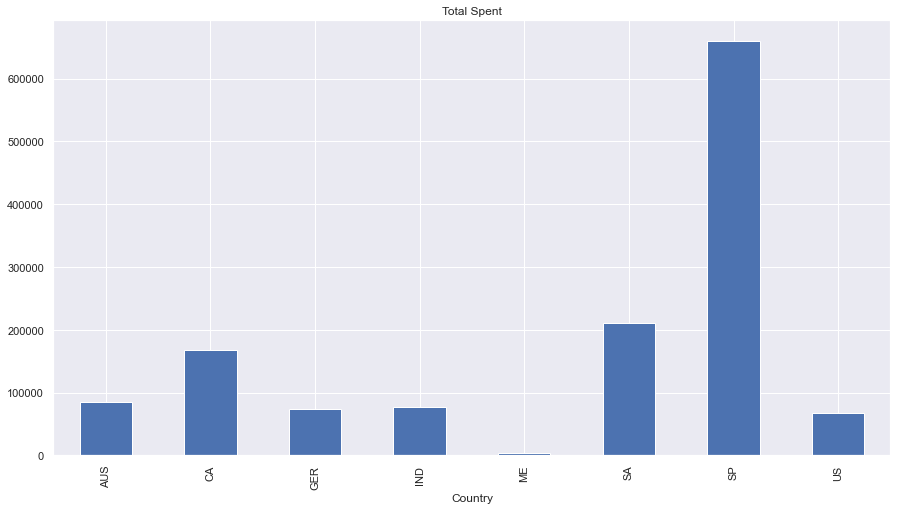

In [282]:
marketing_data.groupby('Country').sum()["TotalSpent"].plot(kind='bar')
plt.title("Total Spent")

Text(0.5, 1.0, 'Total Purchases')

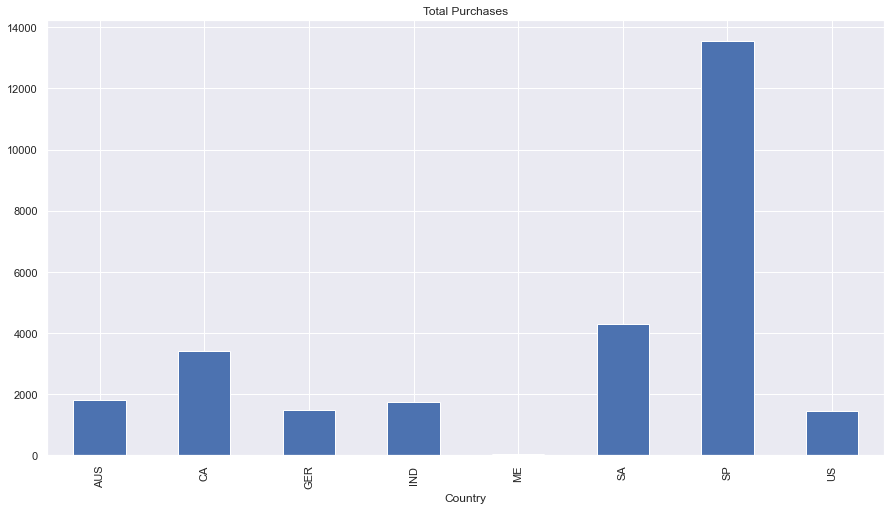

In [283]:
marketing_data.groupby('Country').sum()["TotalPurchases"].plot(kind='bar')
plt.title("Total Purchases")

Text(0.5, 1.0, 'Total Spent by Campaign')

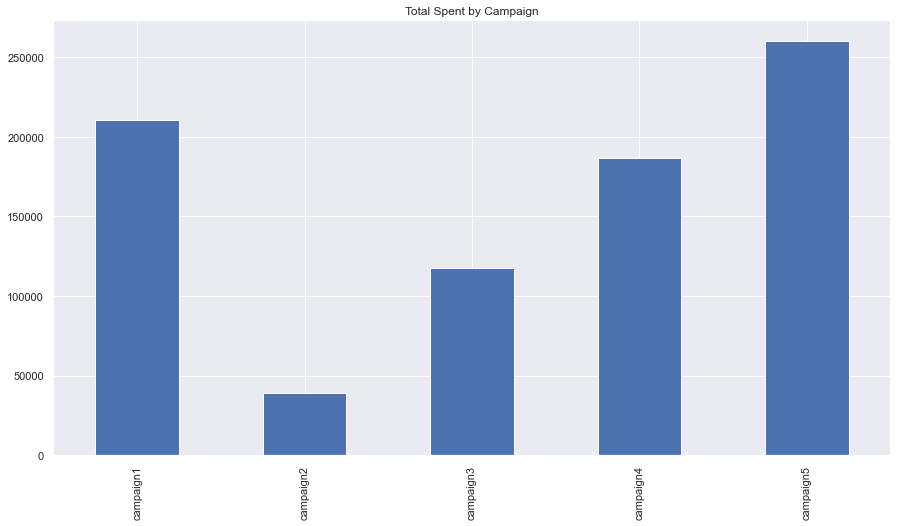

In [284]:
campaign_df["TotalSpent"].plot(kind="bar")
plt.title("Total Spent by Campaign")

Text(0.5, 1.0, 'Total Purchases by Campaign')

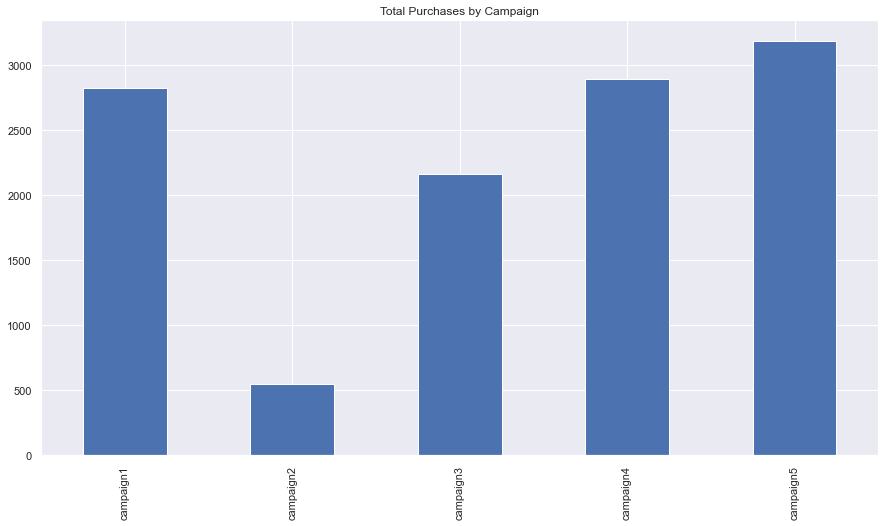

In [285]:
campaign_df["TotalPurchases"].plot(kind="bar")
plt.title("Total Purchases by Campaign")

Text(0.5, 1.0, 'Web Purchases')

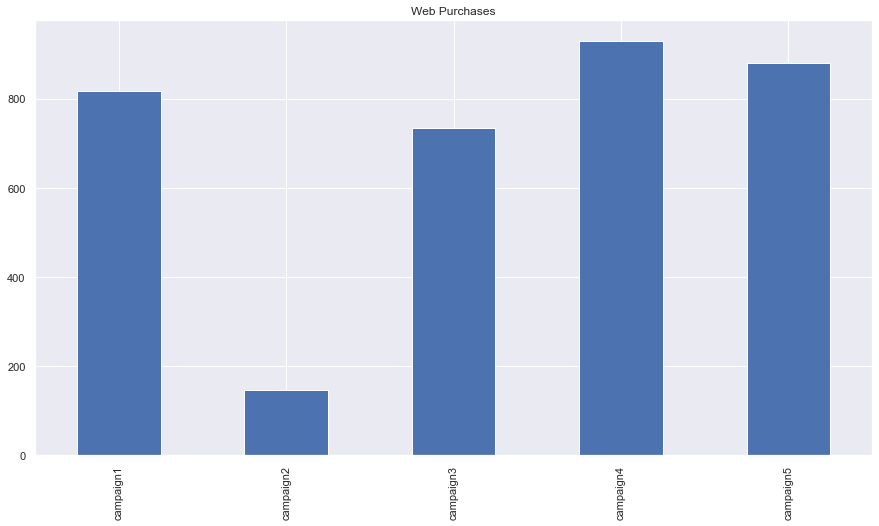

In [286]:
campaign_df["NumWebPurchases"].plot(kind="bar")
plt.title("Web Purchases")

Text(0.5, 1.0, 'Web Purchases by Campaign')

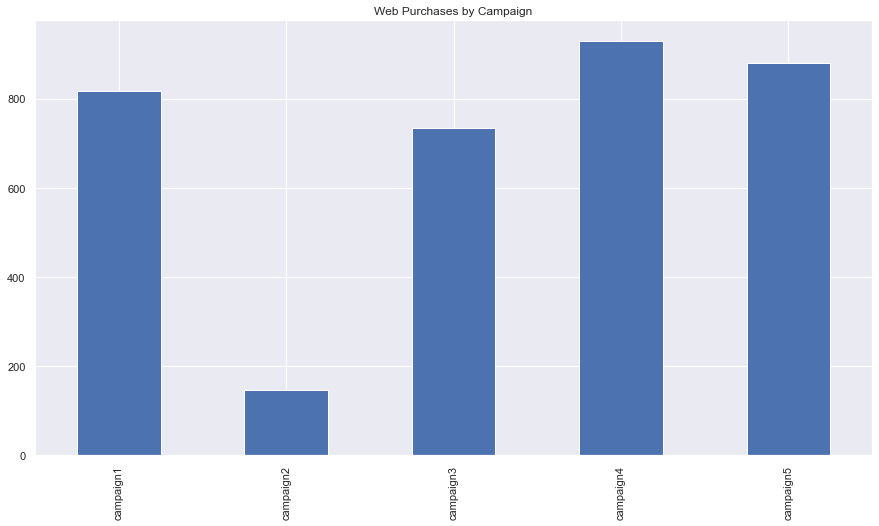

In [287]:
campaign_df["NumWebPurchases"].plot(kind="bar")
plt.title("Web Purchases by Campaign")

Text(0.5, 1.0, 'Deals Purchases by Campaign')

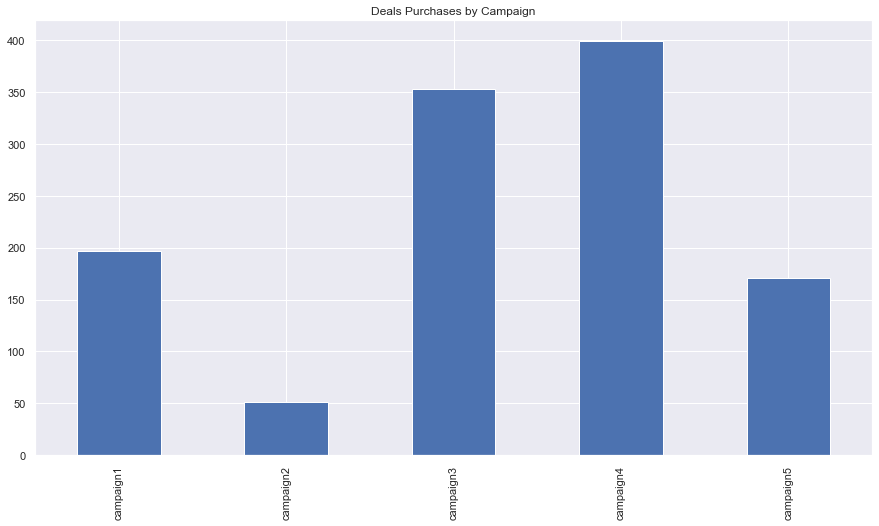

In [288]:
campaign_df["NumDealsPurchases"].plot(kind="bar")
plt.title("Deals Purchases by Campaign")

In [289]:
marketing_data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'TotalSpent',
       'TotalPurchases', 'AverageSpentPerPurchase', 'Age', 'Age_Group',
       'DOW_Enroll'],
      dtype='object')

# Predicitive Modeling

In [290]:
predictor_vars = pd.get_dummies(marketing_data2[["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Age", "Country"]])

lm = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

targets = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'TotalSpent', 'TotalPurchases']

for col in targets:
    
    target = marketing_data2[col]
    
    lm_accuracy = np.mean(cross_val_score(lm, predictor_vars, target, cv=3))

    print("A multiple linear regression model predicted " + col + " with " + str(lm_accuracy) + " accuracy ")
    
    dt_accuracy = np.mean(cross_val_score(dt, predictor_vars, target, cv=3))

    print("A decision tree model predicted " + col + " with " + str(dt_accuracy) + " accuracy ")

    rf_accuracy = np.mean(cross_val_score(rf, predictor_vars, target, cv=3))

    print("A Random Forest Regression model predicted " + col + " with " + str(rf_accuracy) + " accuracy \n")

A multiple linear regression model predicted MntWines with 0.5046941094602745 accuracy 
A decision tree model predicted MntWines with 0.19942554401446302 accuracy 
A Random Forest Regression model predicted MntWines with 0.5411084753610171 accuracy 

A multiple linear regression model predicted MntFruits with 0.32641824153587956 accuracy 
A decision tree model predicted MntFruits with -0.3689965928987004 accuracy 
A Random Forest Regression model predicted MntFruits with 0.2703291478665265 accuracy 

A multiple linear regression model predicted MntMeatProducts with 0.5657431510563403 accuracy 
A decision tree model predicted MntMeatProducts with 0.19549627641763812 accuracy 
A Random Forest Regression model predicted MntMeatProducts with 0.532276719941227 accuracy 

A multiple linear regression model predicted MntFishProducts with 0.36140137378656956 accuracy 
A decision tree model predicted MntFishProducts with -0.25459706460075804 accuracy 
A Random Forest Regression model predicted 

# Linear models and Random Forest models using "Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Age", and "Country" as predictors did not perform well in predicting amount spent on individual products and method of purchase (web, store, etc.). However, a Random Forest model using these predictors explained 72% of the variance of total amount spent. In other words, using these predictors in a Random Forest model can predict how much a customer spends with 72% accuracy. 